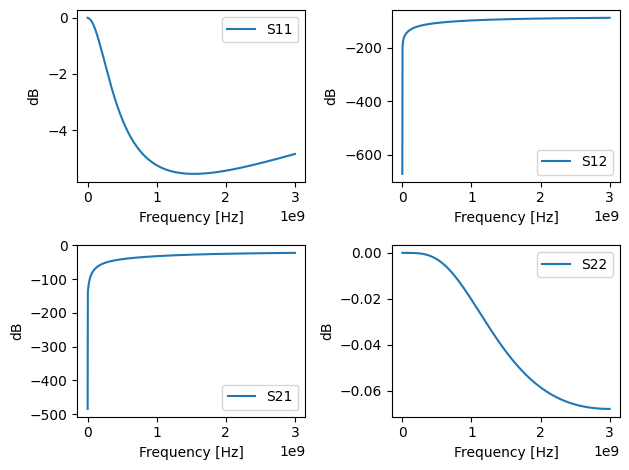

In [1]:
from matplotlib import pyplot as plt
from configuration import skywater_configuration
from services.ExtractSParameters import ExtractSParametersService
from subCircuits.LNA import LNASubCircuit

test_subcircuit = LNASubCircuit(
    "test",
    nfet_type=skywater_configuration.nfet_type,
    pfet_type=skywater_configuration.pfet_type,
    c1=1.760011623829603e-11,
    cm1=1.7124060225486756e-11,
    cm2=1.8947868962883948e-11,
    cm3=5.416065746545791e-13,
    l1=35.25476063966751,
    l2=32.957107959985734,
    l3=38.06572427272797,
    lg=5.53381922841072e-10,
    lpk=7.58953581303358e-09,
    rf=65736.40324175358,
    rpol1=92193.67206096649,
    rpol2=35182.76825547218,
    vpol1=0.8043120324611663,
    vpol2=1.6785887360572815,
    w1=93.52270918190479,
    w2=10.99694906949997,
    w3=91.55357965350152,
    vcc=1.8,
    vdd=1.8,
)
s_parameters = ExtractSParametersService.execute(test_subcircuit, 1, 3e9, 1000)


plt.subplot(2, 2, 1)
plt.plot(s_parameters.frequency, s_parameters.S11_db, label="S11")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 2)
plt.plot(s_parameters.frequency, s_parameters.S12_db, label="S12")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 3)
plt.plot(s_parameters.frequency, s_parameters.S21_db, label="S21")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 4)
plt.plot(s_parameters.frequency, s_parameters.S22_db, label="S22")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.tight_layout()
plt.show()


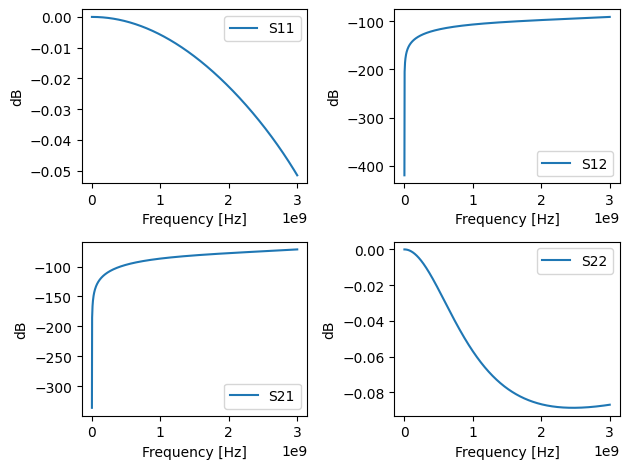

In [2]:
from matplotlib import pyplot as plt
from configuration import skywater_configuration
from services.ExtractSParameters import ExtractSParametersService
from subCircuits.LNATB import LNATBSubCircuit

test_subcircuit = LNATBSubCircuit(
    name="test",
    nfet_type=skywater_configuration.nfet_type,
    l3=0.15,
    w3=7.2,
    vdd=1.8,
    R1=10E3,
    R2=2E3,
    LG=29.6E-9,
    w1=52,
    l1=0.15,
    LS=2.9E-9,
    l2=0.15,
    w2=52,
    RTANk=10E3,
    LTANK=9E-9,
    CTANK=0.47E-12,
    CG=10E-12
)
s_parameters = ExtractSParametersService.execute(test_subcircuit, 1, 3e9, 1000)


plt.subplot(2, 2, 1)
plt.plot(s_parameters.frequency, s_parameters.S11_db, label="S11")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 2)
plt.plot(s_parameters.frequency, s_parameters.S12_db, label="S12")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 3)
plt.plot(s_parameters.frequency, s_parameters.S21_db, label="S21")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.subplot(2, 2, 4)
plt.plot(s_parameters.frequency, s_parameters.S22_db, label="S22")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.tight_layout()
plt.show()


In [3]:
from typing import Literal
from PySpice.Spice.Netlist import SubCircuit
from circuits import Circuit
from PySpice.Spice.NgSpice.Shared import NgSpiceShared
from PySpice.Probe.WaveForm import NoiseAnalysis
from PySpice.Spice.NgSpice.Simulation import NgSpiceSharedCircuitSimulator
class ExtractNoiseService:
    @staticmethod
    def execute(
        sub_circuit: SubCircuit,
        start_frequency: float,
        stop_frequency: float,
        number_of_points: int,
        simulator: Literal[
            "ngspice-subprocess",
            "ngspice-shared",
        ] = "ngspice-shared",
        temperature: float=25,
        nominal_temperature:float=25,
        variation: Literal["dec", "oct", "lin"] = "lin",
    )->NoiseAnalysis:
        circuit = Circuit("test")
        circuit.SinusoidalVoltageSource("inp", "net1", 0)
        circuit.subcircuit(subcircuit=sub_circuit)
        circuit.X(1, sub_circuit.name, "inp", "out")
        circuit.R("1", "net1", "inp", 50)
        simulator:NgSpiceSharedCircuitSimulator = circuit.simulator(
            temperature=temperature,
            nominal_temperature=nominal_temperature,
        )
        simulator.ngspice.set("sqrnoise")
        print(simulator.ngspice.ngspice_version)
        
        try:
            analysis:NoiseAnalysis = simulator.noise(
                output_node="out",
                ref_node="0",
                src="Vinp",
                variation=variation,
                points=number_of_points,
                start_frequency=start_frequency,
                stop_frequency=stop_frequency,
                )
            print(type(analysis))
            # analysis = simulator.ac(
            #     start_frequency=start_frequency,
            #     stop_frequency=stop_frequency,
            #     number_of_points=number_of_points,
            #     variation=variation,
            # )
        except Exception as exception:
            ngspice: NgSpiceShared = simulator.ngspice
            try:
                ngspice.quit()
            except:
                pass
            finally:
                raise exception
        ngspice: NgSpiceShared = simulator.ngspice
        ngspice.remove_circuit()
        ngspice.destroy()

        return analysis

In [4]:
from matplotlib import pyplot as plt
from configuration import skywater_configuration

analysis = ExtractNoiseService.execute(
    sub_circuit=test_subcircuit,
    start_frequency=2.4E9,
    stop_frequency=2.6E9,
    number_of_points=100,
    variation="lin"
)


26
<class 'PySpice.Probe.WaveForm.NoiseAnalysis'>


In [5]:
dir(analysis)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_branches',
 '_elements',
 '_format_dict',
 '_get_item',
 '_internal_parameters',
 '_nodes',
 '_simulation',
 'branches',
 'elements',
 'internal_parameters',
 'nodes',
 'simulation']

In [6]:
analysis.simulation.ngspice.set("sqrnoise")

In [7]:
analysis.nodes

{'inoise_total': WaveForm inoise_total [3.67045334e-05]@V,
 'onoise_total': WaveForm onoise_total [1.24466321e-10]@V}